In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [60]:
df = pd.read_csv("all_data.csv").drop(columns=['Unnamed: 0'])

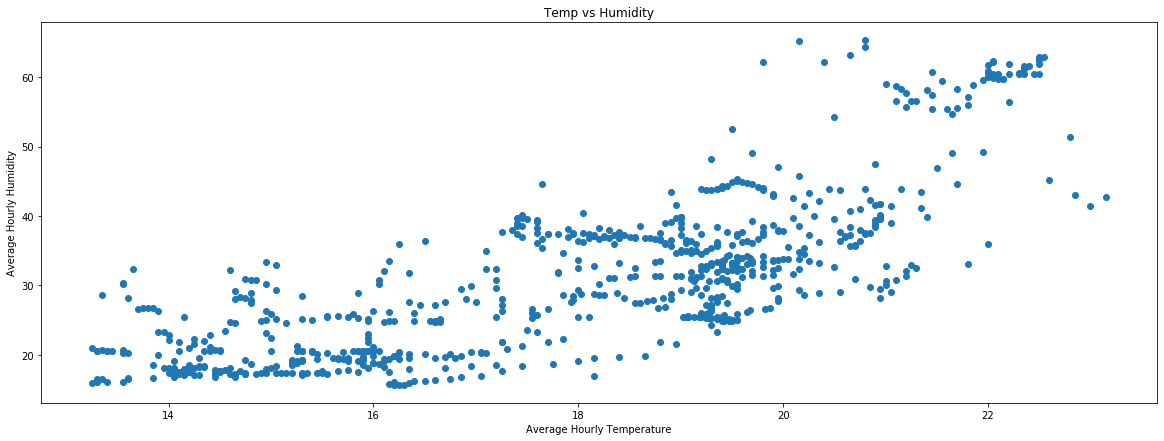

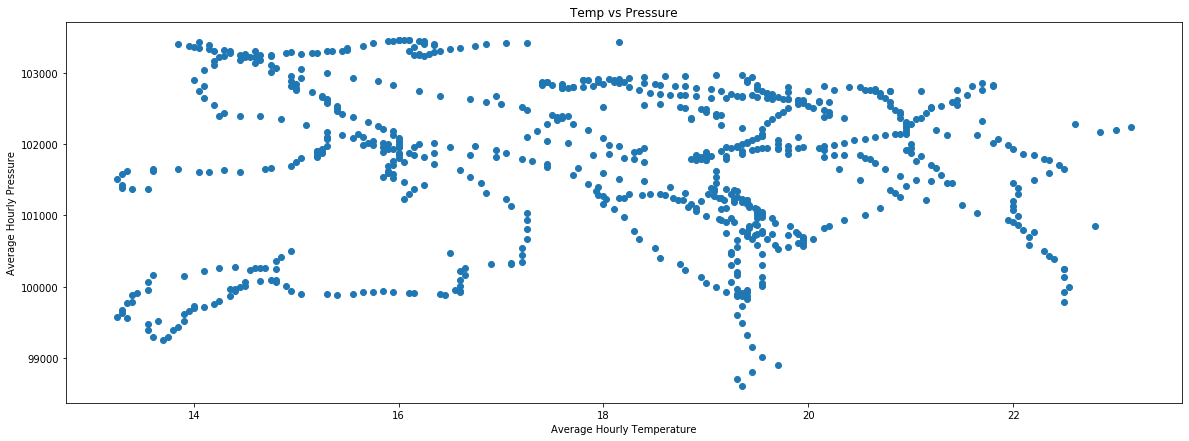

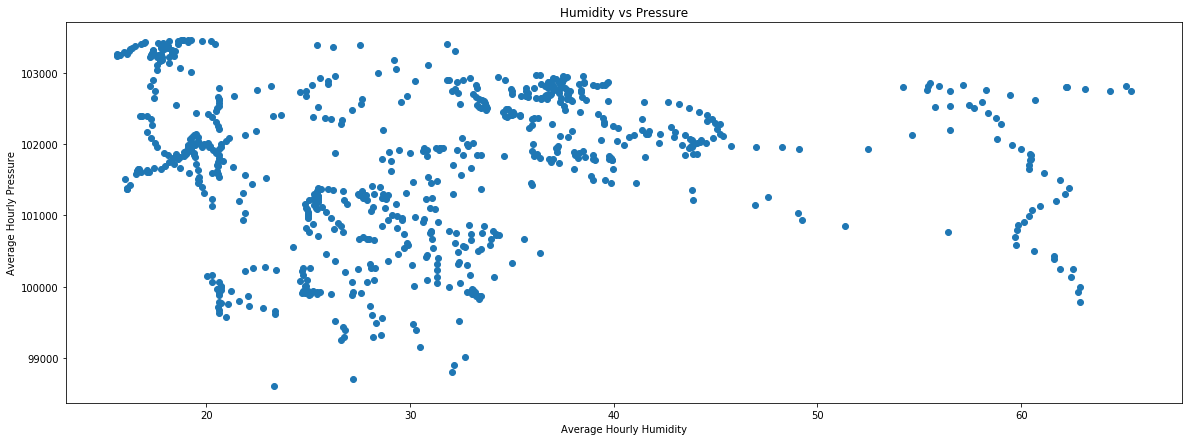

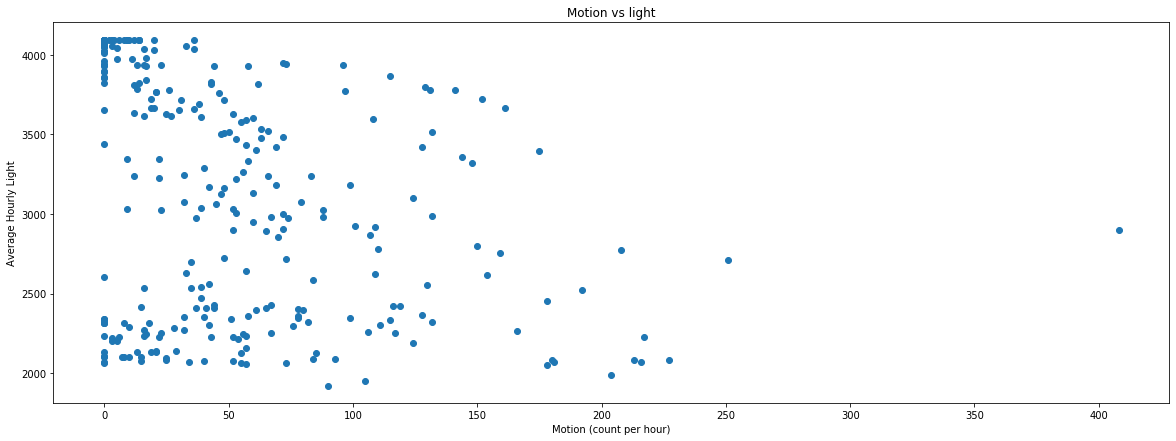

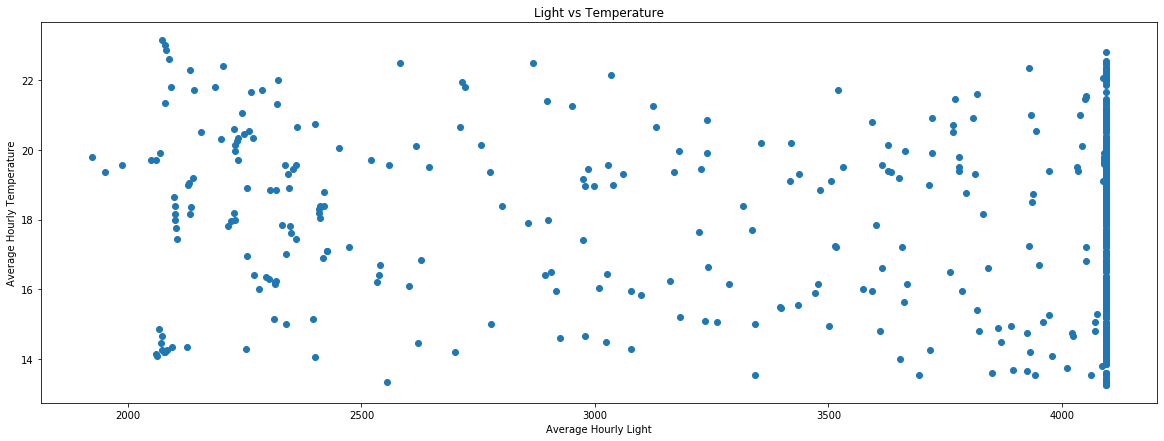

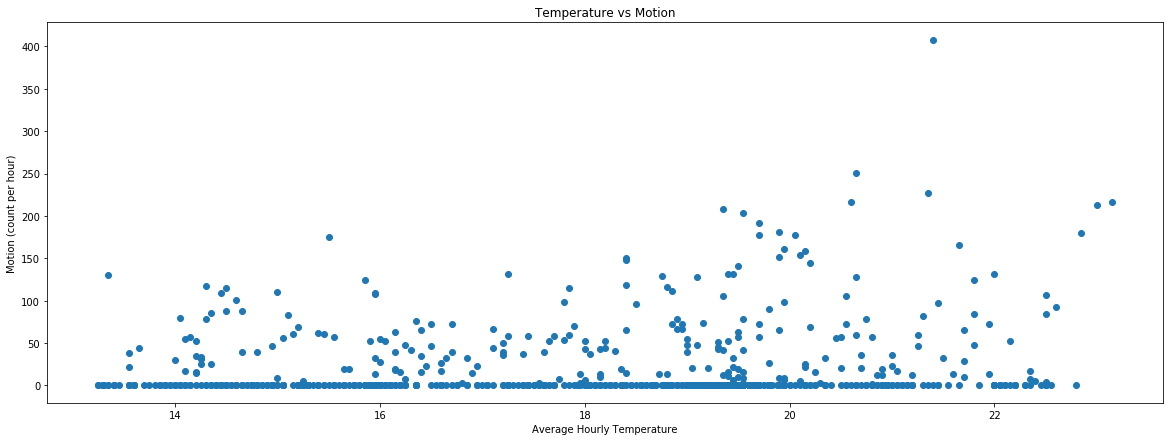

In [61]:
# predict business - number of obligations that day, or indicators: 0 less busy, 1 very busy
plt.scatter(df['avg_hrly_temp'], df['avg_hrly_hum'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Average Hourly Humidity")
plt.title("Temp vs Humidity")
plt.show()

plt.scatter(df['avg_hrly_temp'], df['avg_hrly_press'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Average Hourly Pressure")
plt.title("Temp vs Pressure")
plt.show()

plt.scatter(df['avg_hrly_hum'], df['avg_hrly_press'])
plt.xlabel("Average Hourly Humidity")
plt.ylabel("Average Hourly Pressure")
plt.title("Humidity vs Pressure")
plt.show()

plt.scatter(df['tot_motion_count'], df['avg_hrly_light'])
plt.xlabel("Motion (count per hour)")
plt.ylabel("Average Hourly Light")
plt.title("Motion vs light")
plt.show()

plt.scatter(df['avg_hrly_light'], df['avg_hrly_temp'])
plt.xlabel("Average Hourly Light")
plt.ylabel("Average Hourly Temperature")
plt.title("Light vs Temperature")
plt.show()

plt.scatter(df['avg_hrly_temp'],df['tot_motion_count'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Motion (count per hour)")
plt.title("Temperature vs Motion")
plt.show()

In [62]:
df.columns

Index(['day', 'hour', 'month', 'weekday', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light',
       'num_psets_due'],
      dtype='object')

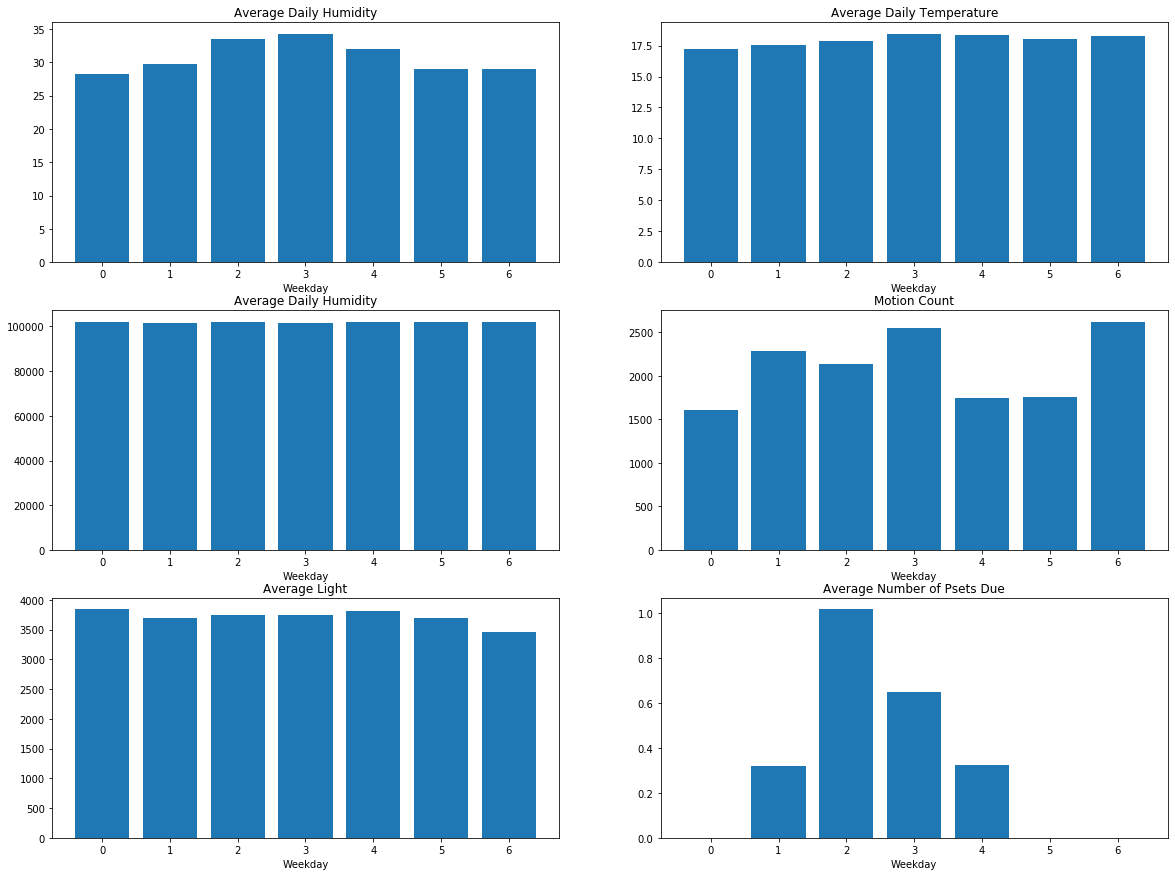

In [63]:
df_by_day = df.groupby("weekday").agg({'avg_hrly_hum':'mean', 'avg_hrly_temp':'mean',
                                                  'avg_hrly_press':'mean','tot_motion_count':'sum',
                                                  'avg_hrly_light':'mean', 'num_psets_due':'mean'})
label = ["M", "T", "W", "Th", "F", "Sat", "Sun"]
cols = ['avg_hrly_hum', 'avg_hrly_temp', 'avg_hrly_press','tot_motion_count',
       'avg_hrly_light', 'num_psets_due']
titles = ['Average Daily Humidity', 'Average Daily Temperature', 'Average Daily Humidity','Motion Count',
       'Average Light', 'Average Number of Psets Due']

fig, axes = plt.subplots(3,2,figsize=(20,15))
axes = axes.ravel()
for i in range(6):
    # axes[0].violin(dist_by_day.index, dist_by_day.casual)
    axes[i].bar(df_by_day.index, df_by_day[cols[i]])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Weekday")
#     axes[i].set_ylabel("Count")
plt.show()

In [64]:
df_by_day.columns

Index(['avg_hrly_hum', 'avg_hrly_temp', 'avg_hrly_press', 'tot_motion_count',
       'avg_hrly_light', 'num_psets_due'],
      dtype='object')

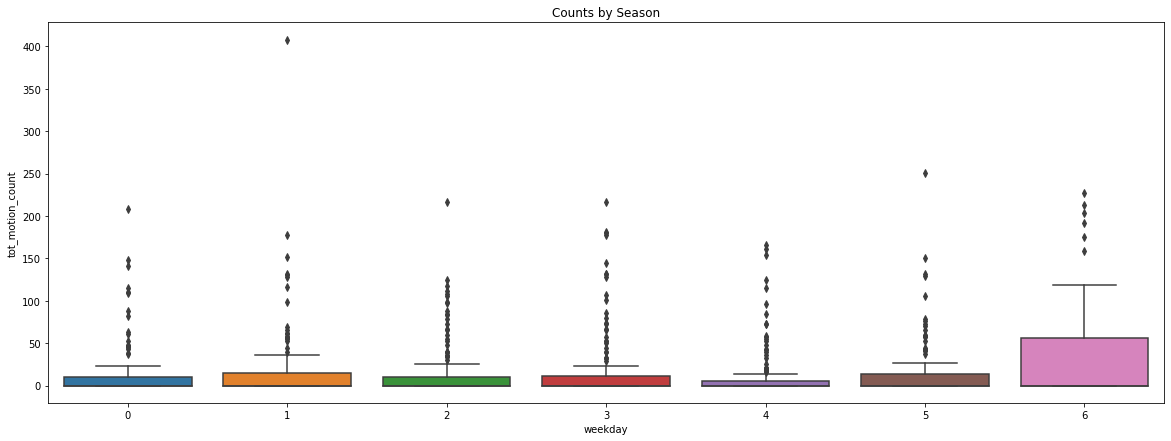

In [65]:
import seaborn as sns
sns.boxplot(x='weekday', y="tot_motion_count", data=df) # - sns package in section but not notebook?
plt.title("Counts by Season")
plt.grid(False)
plt.show()

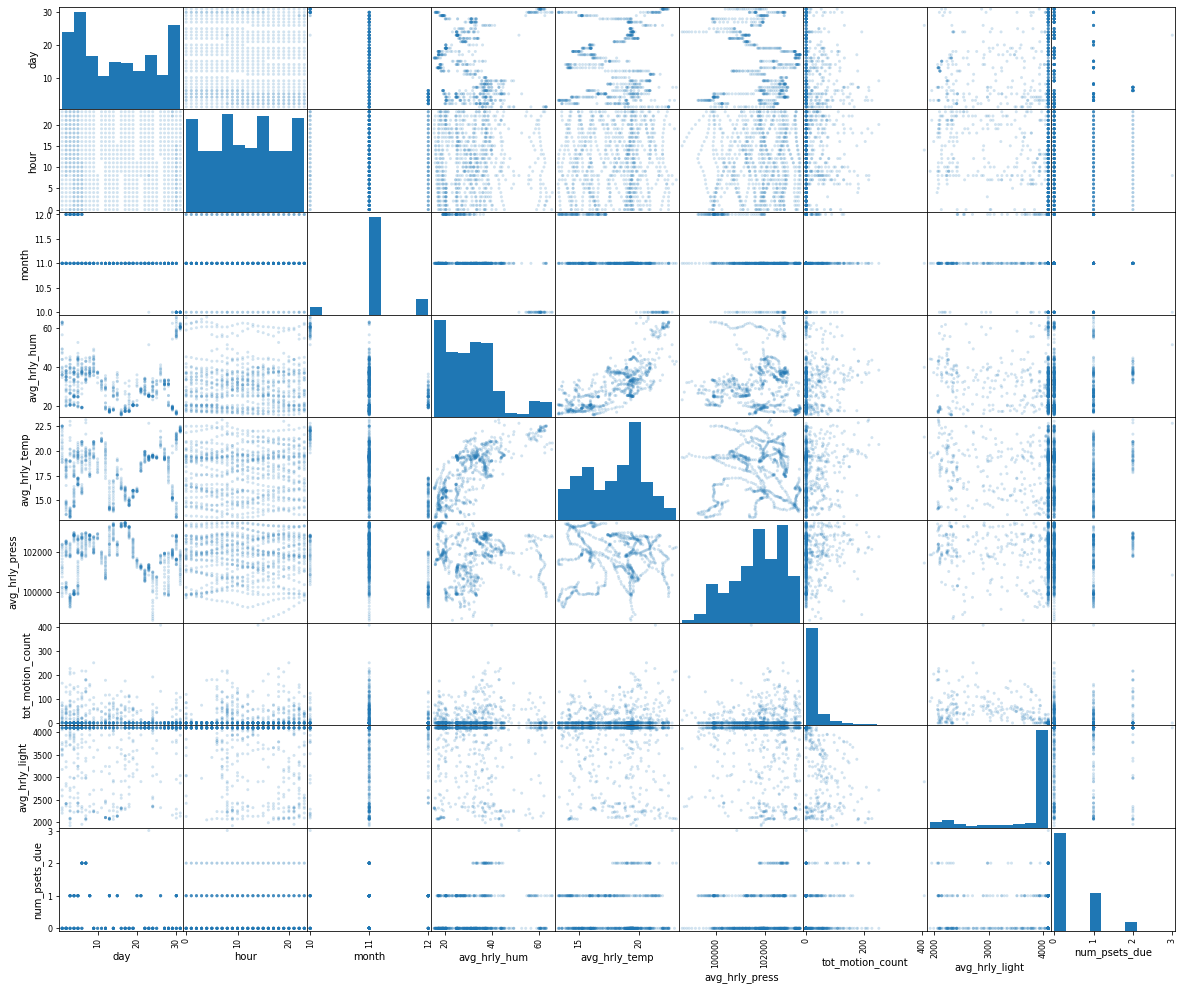

In [66]:
# how to make this figure bigger?
cor_columns = ['day', 'hour', 'month', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light',
       'num_psets_due']

#plt.figure(figsize = (20,20))
scatter_matrix(df[cor_columns], alpha=0.2, figsize=(20,17))
plt.show()

Correlations found: humidity and temperature

In [67]:
# group by hour
# subset each weekday
# plot motion count

In [70]:
df.head()

,day,hour,month,weekday,avg_hrly_hum,avg_hrly_temp,avg_hrly_press,tot_motion_count,avg_hrly_light,num_psets_due
0,23,8,10,2,51.35,22.80,100858.130,0.0,4095.00,3
1,29,22,10,1,54.20,20.50,102802.440,57.0,2155.50,0
2,29,23,10,1,62.25,19.80,102801.110,26.0,3780.75,0
3,30,0,10,2,65.15,20.15,102810.425,0.0,4095.00,1
4,30,1,10,2,62.20,20.40,102802.390,0.0,4095.00,1


In [71]:
d = {'tot_motion_count':'mean'}
M = df[df.weekday == 0].groupby("hour").aggregate(d)
T = df[df.weekday == 1].groupby("hour").aggregate(d)
W = df[df.weekday == 2].groupby("hour").aggregate(d)
TH = df[df.weekday == 3].groupby("hour").aggregate(d)
F = df[df.weekday == 4].groupby("hour").aggregate(d)
SA = df[df.weekday == 5].groupby("hour").aggregate(d)
SU = df[df.weekday == 6].groupby("hour").aggregate(d)

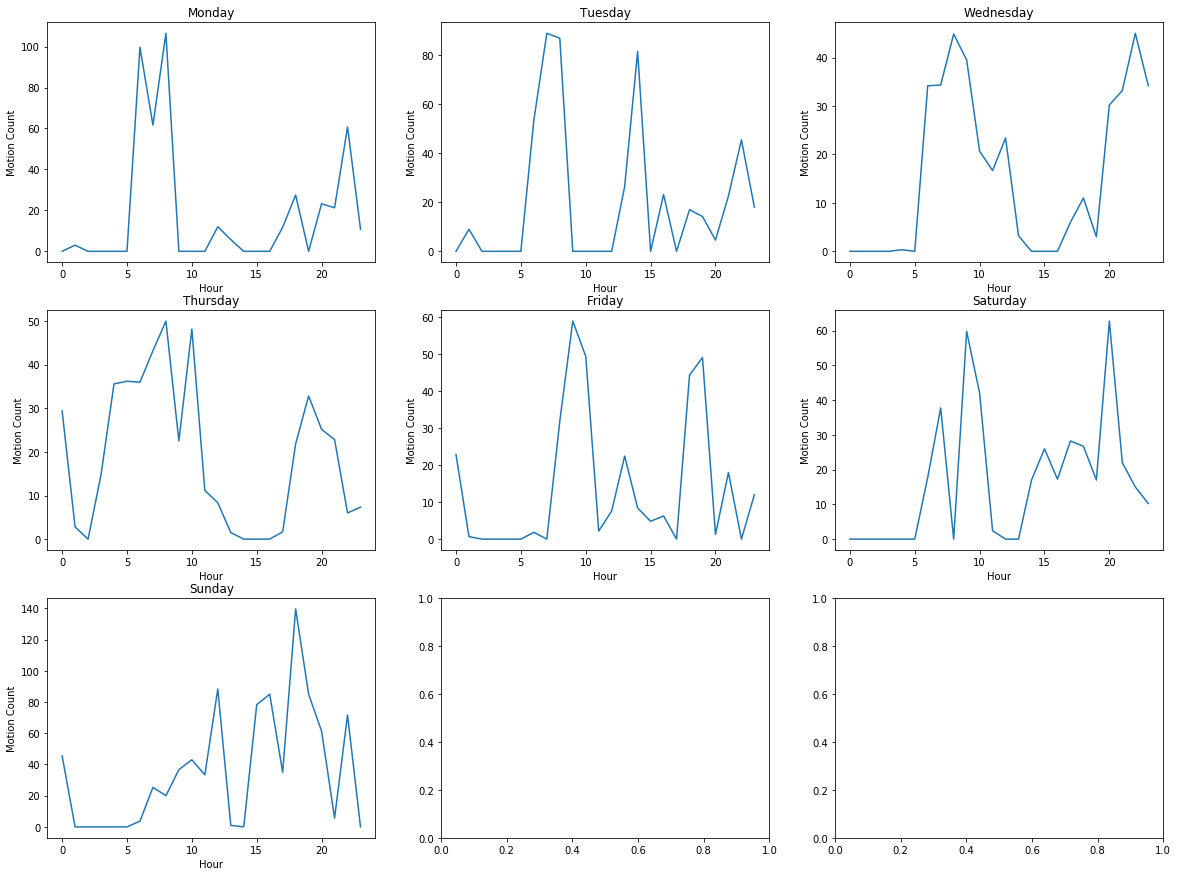

In [72]:
# counts by weather type
fig, axes = plt.subplots(3,3,figsize=(20,15))
axes = axes.ravel()

label = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dfs = [M,T,W,TH,F,SA,SU]
cols = ['tot_motion_count']
# titles = ['Average Daily Humidity', 'Average Daily Temperature', 'Average Daily Humidity','Motion Count',
#        'Average Light', 'Average Number of Psets Due']

for i in range(7):
    # axes[0].violin(dist_by_day.index, dist_by_day.casual)
    axes[i].plot(dfs[i].index, dfs[i].tot_motion_count)
    axes[i].set_title(label[i])
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Motion Count")
#     axes[0].legend()
plt.show()

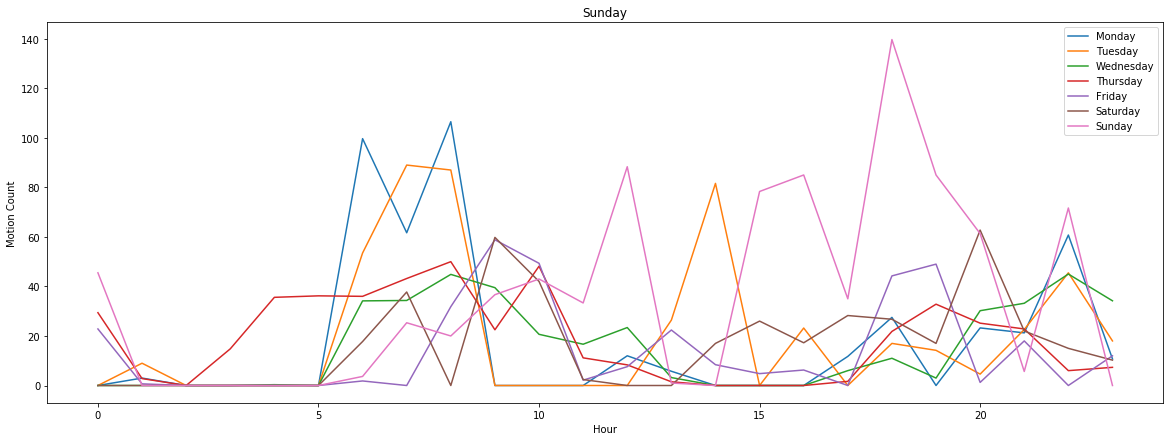

In [73]:
# fig2, axes2 = plt.subplots(1,1,figsize=(20,15))
# print(axes1)
# axes2 = axes2.ravel()
for i in range(7):
    # axes[0].violin(dist_by_day.index, dist_by_day.casual)
    plt.plot(dfs[i].index, dfs[i].tot_motion_count, label=label[i])
    plt.title(label[i])
    plt.xlabel("Hour")
    plt.ylabel("Motion Count")
plt.rcParams["figure.figsize"] = (20,7)
plt.legend()
plt.show()

## things to consider:

-potentially could add sleep score, or number hours of sleep

-outlier points 

-normalize and standardize

-model

-plotting residuals